In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hp_pieces = []
for year in [2015, 2016, 2017, 2018, 2019]:
    hp_pieces.append(pd.read_csv(f"../output/{year}_hp.csv"))
hp = pd.concat(hp_pieces)

In [3]:
exo_pieces = []
for year in [2015, 2016, 2017, 2018, 2019]:
    exo_pieces.append(pd.read_csv(f"../output/{year}_exo.csv"))
exo = pd.concat(exo_pieces)

In [4]:
peri = pd.read_csv(f"../output/peri.csv")

In [5]:
hp_peri = pd.merge(hp, peri, on="orbit")

# restrict
hp_peri = hp_peri[hp_peri["n_orbits"] > 9]
hp_peri = hp_peri[hp_peri["score"] > 0.8]

In [6]:
exo_peri = pd.merge(exo, peri, on="orbit")

# restrict
exo_peri = exo_peri[exo_peri["n_orbits"] > 10]
#exo_peri = exo_peri[exo_peri["score"] > 0.8]

In [7]:
hp_peri["dt"] = pd.to_datetime(hp_peri["t_utc"], format="%Y-%m-%dT%H:%M:%S")
exo_peri["dt"] = pd.to_datetime(exo_peri["t_utc"], format="%Y-%m-%dT%H:%M:%S")

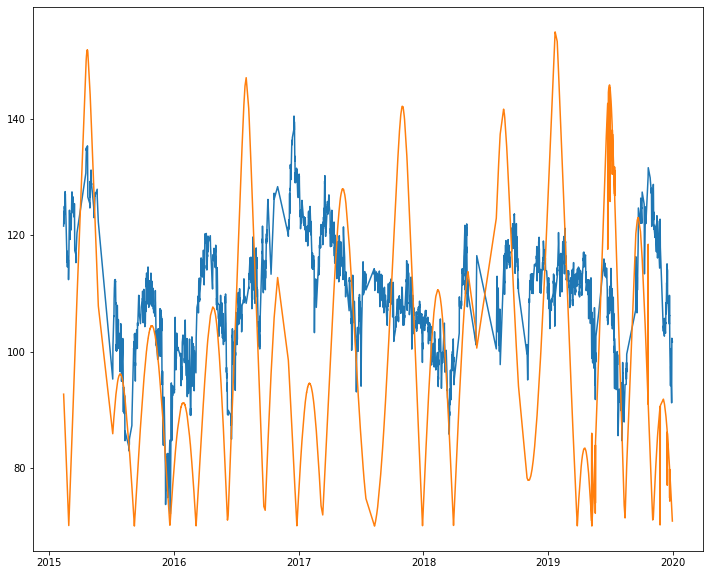

In [8]:
plt.figure(figsize=(12, 10))
plt.plot(hp_peri["dt"], hp_peri["hp_alt"])
plt.plot(hp_peri["dt"], np.abs(90-hp_peri["sza"])+70)
plt.show()

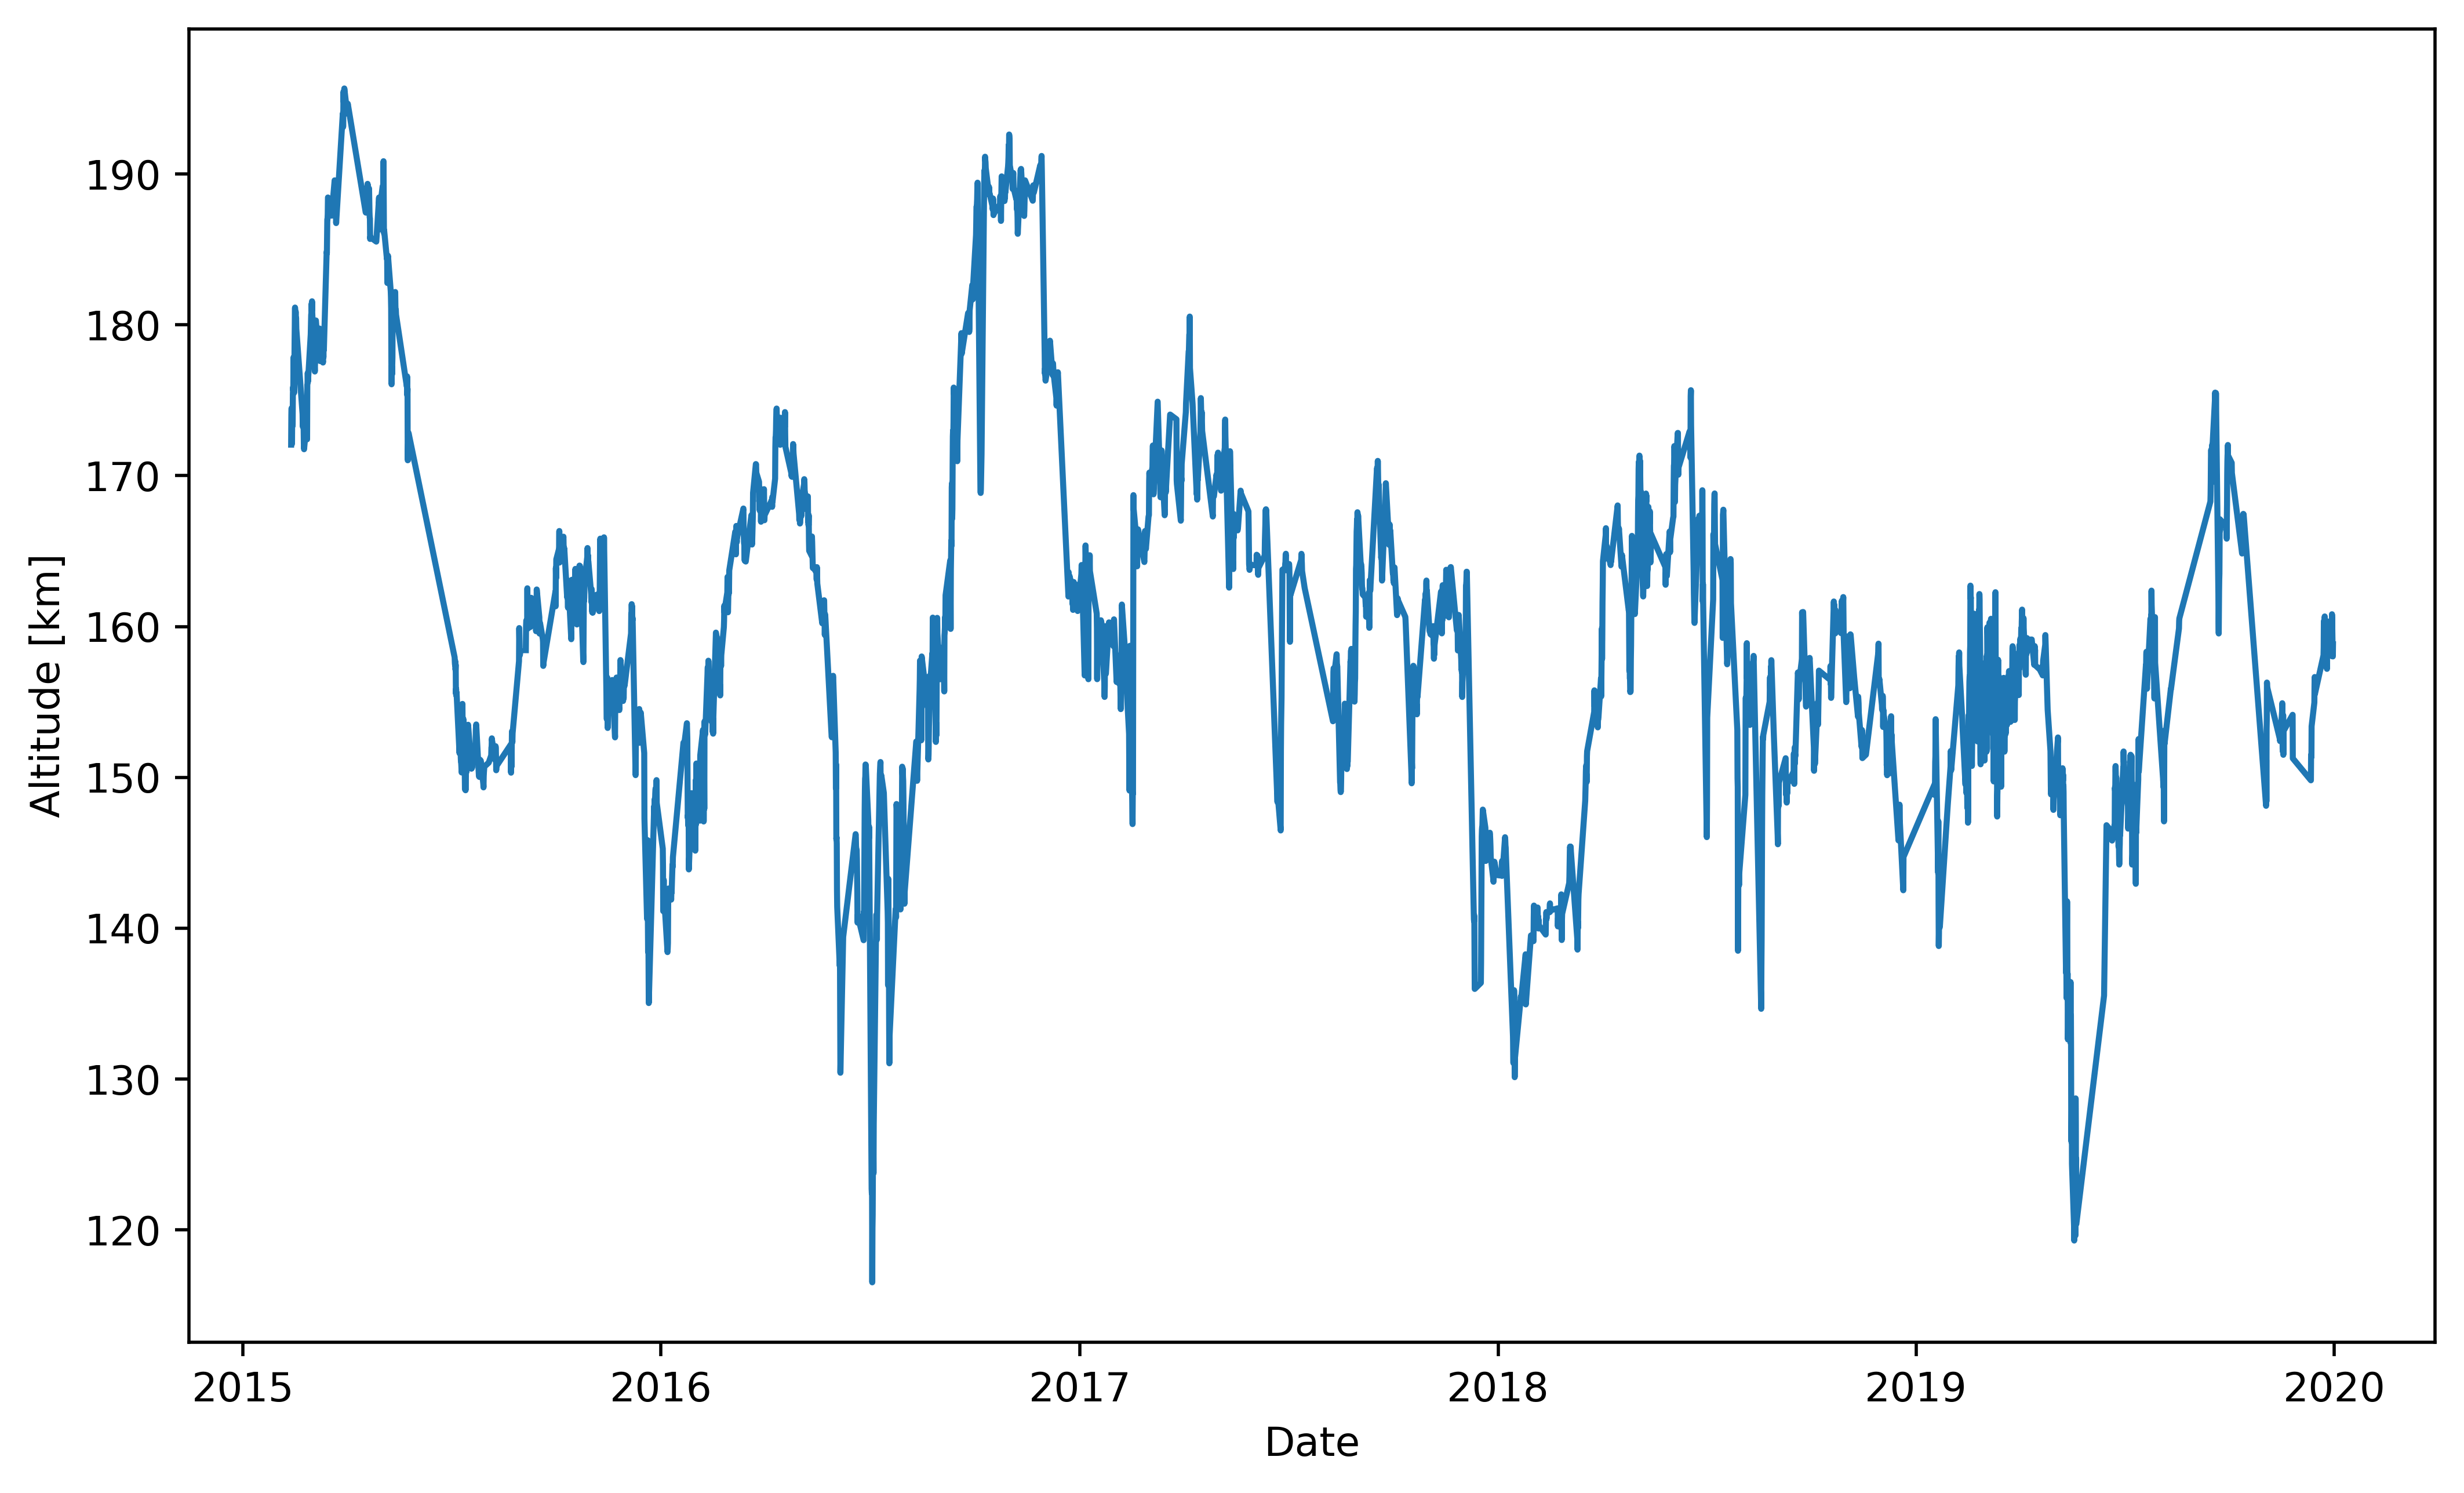

In [12]:
plt.figure(figsize=(10, 6), dpi=500)
plt.plot(exo_peri["dt"], exo_peri["exo_alt"])
#plt.plot(hp_peri["dt"], hp_peri["hp_alt"])
plt.xlabel("Date")
plt.ylabel("Altitude [km]")
plt.show()

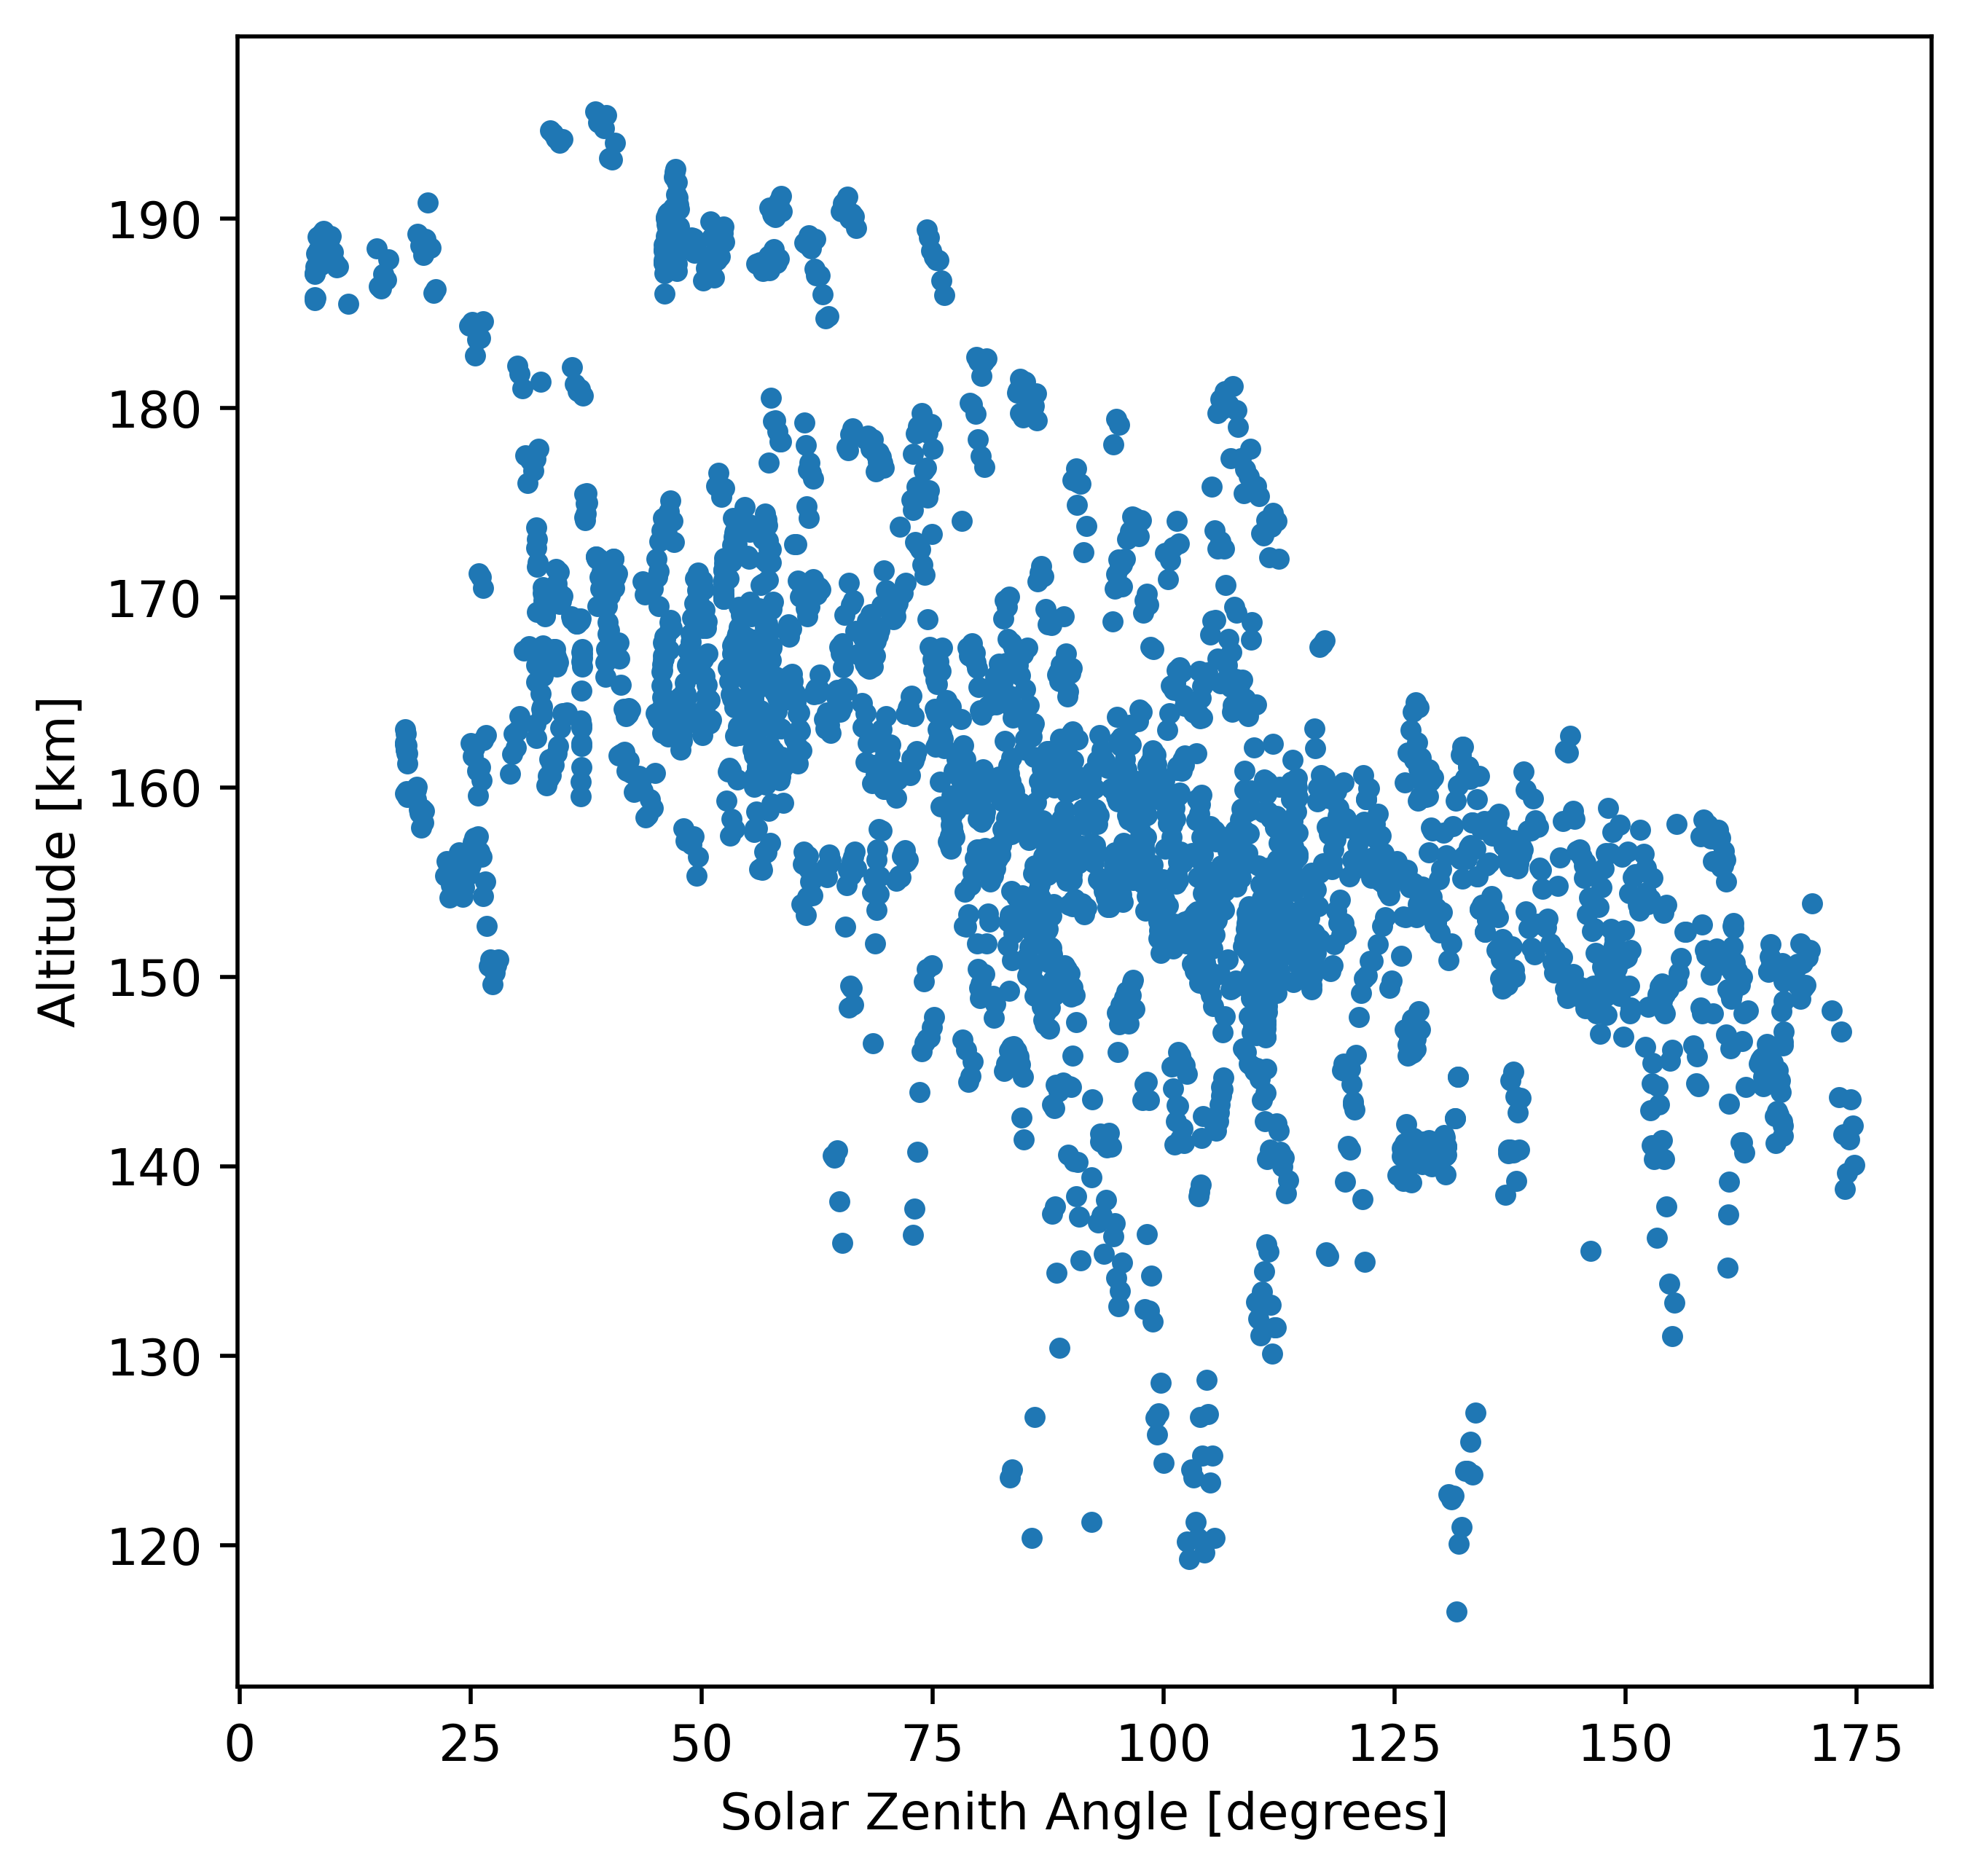

In [26]:
plt.figure(figsize=(6, 6), dpi=500)
plt.scatter(exo_peri["sza"], exo_peri["exo_alt"], s=10)
#plt.plot(hp_peri["dt"], hp_peri["hp_alt"])
plt.xlabel("Solar Zenith Angle [degrees]")
plt.ylabel("Altitude [km]")
plt.show()

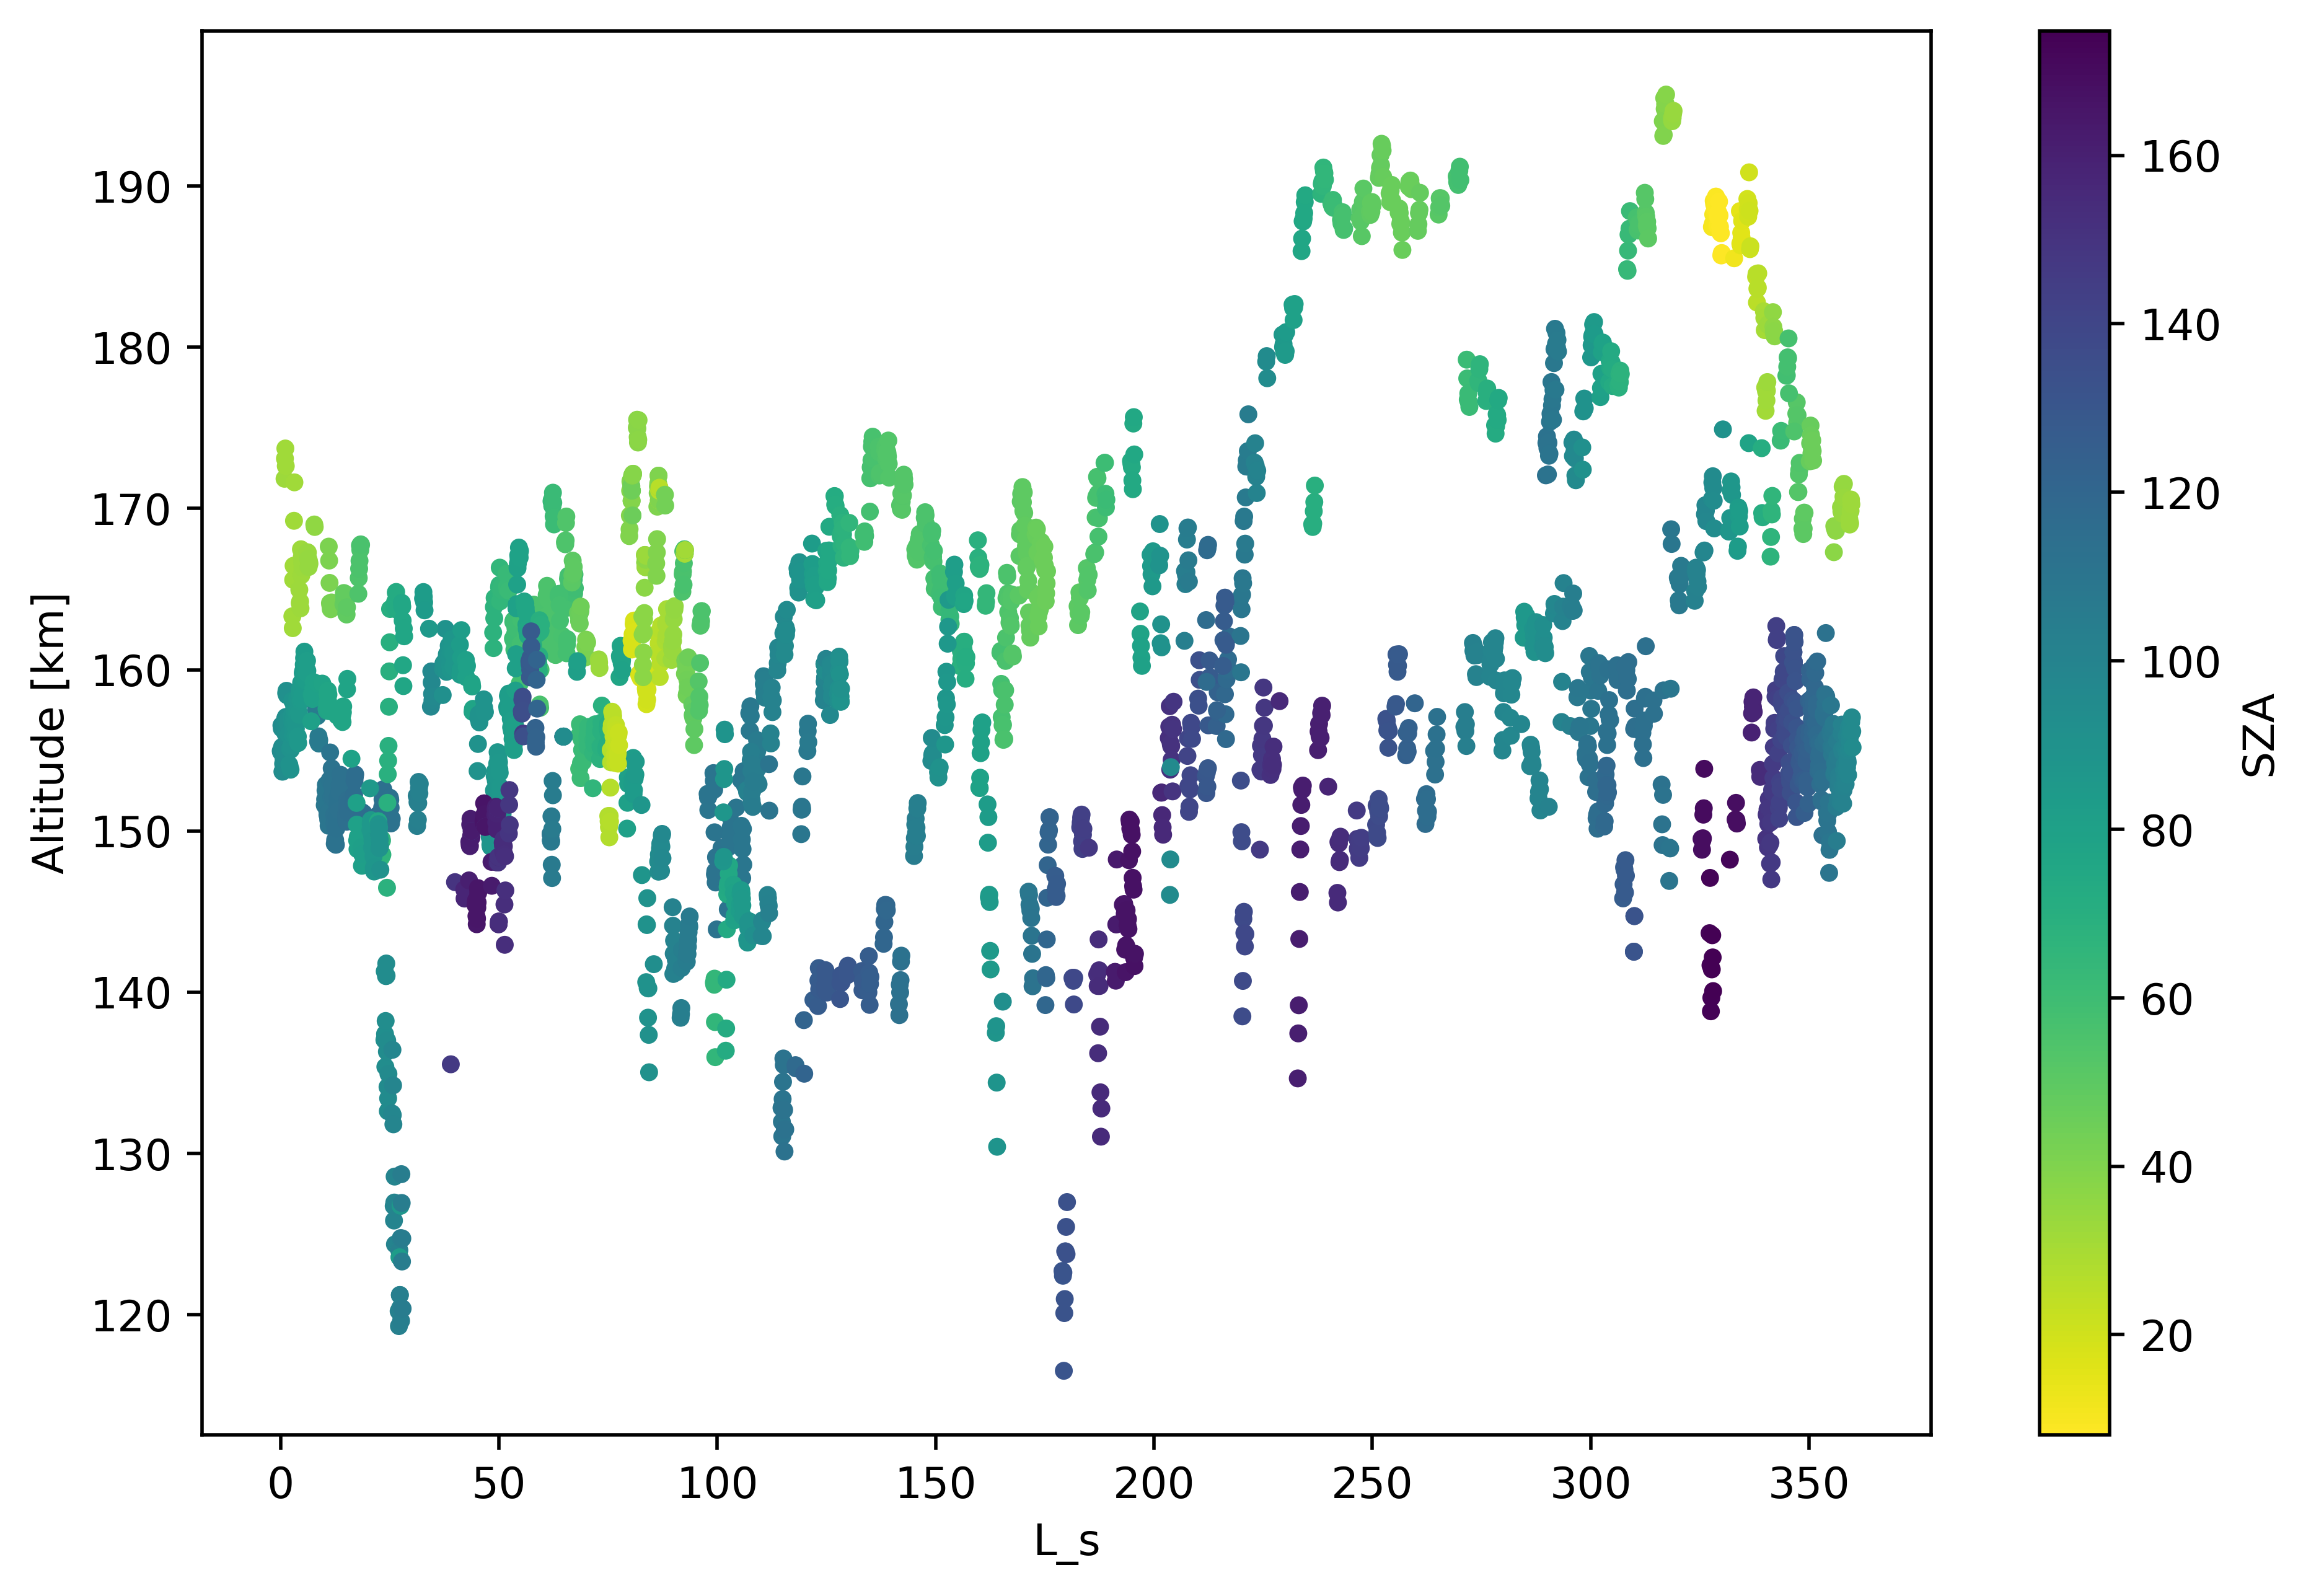

In [28]:
plt.figure(figsize=(9, 6), dpi=500)
plt.scatter(exo_peri["Ls"], exo_peri["exo_alt"], c=exo_peri["sza"], s=10, cmap="viridis_r")
#plt.plot(hp_peri["dt"], hp_peri["hp_alt"])
plt.xlabel("L_s")
plt.ylabel("Altitude [km]")
plt.colorbar(label="SZA")
plt.show()

In [34]:
exo_peri.head()

,orbit,exo_alt,fit_slope,fit_intercept,n_orbits,t_utc,t_unix,alt,lst,long,lat,sza,Ls,dt
5,718,172.060146,-0.018078,4.110440,11,2015-02-12T02:38:50,1.423709e+09,134.4595,18.58333,98.82664,44.09195,112.4239,289.745919,2015-02-12 02:38:50
6,719,174.072496,-0.018771,4.267538,11,2015-02-12T07:12:35,1.423725e+09,131.4577,18.56417,31.96080,43.99084,112.1887,289.862114,2015-02-12 07:12:35
7,720,174.477504,-0.018876,4.293464,11,2015-02-12T11:46:13,1.423742e+09,131.3000,18.53889,-34.97263,43.78666,111.8660,289.978233,2015-02-12 11:46:13
8,721,173.742302,-0.018762,4.259698,11,2015-02-12T16:19:46,1.423758e+09,130.7289,18.51944,-101.79540,43.71284,111.6324,290.094292,2015-02-12 16:19:46
9,722,172.116339,-0.018296,4.148958,11,2015-02-12T20:53:11,1.423774e+09,131.4341,18.50139,-168.56750,43.65751,111.4172,290.210268,2015-02-12 20:53:11


In [32]:
exo_peri["exo_alt"].mean(), exo_peri["exo_alt"].median()

(159.56818613554515, 158.37176221465572)

<Figure size 432x288 with 0 Axes>

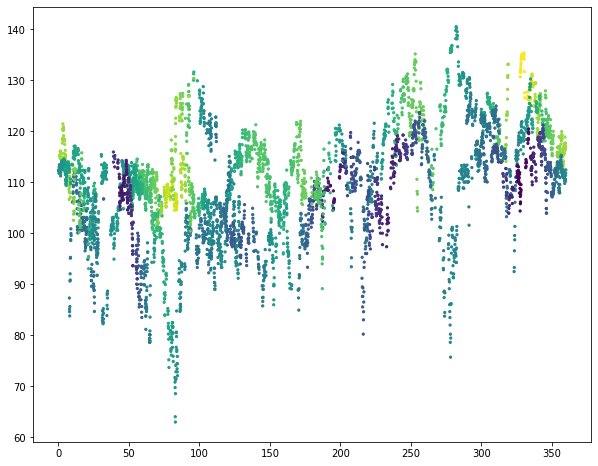

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(10, 8))
plt.scatter(hp_peri["Ls"], hp_peri["hp_alt"], s=5, c=hp_peri["sza"].apply(lambda x: 180-x))
plt.show()

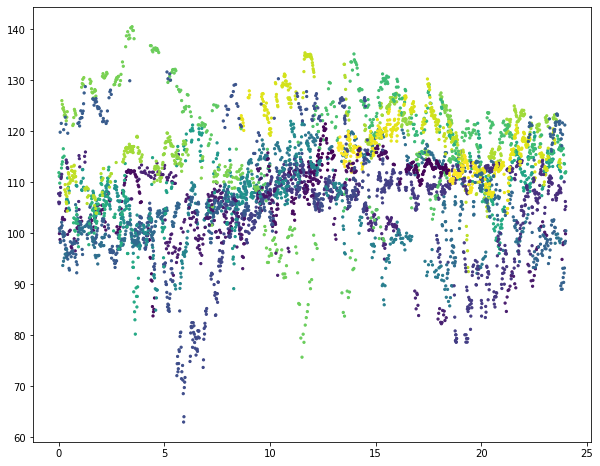

In [43]:
plt.figure(figsize=(10, 8))
plt.scatter(hp_peri["lst"], hp_peri["hp_alt"], s=5, c=hp_peri["Ls"])
plt.show()

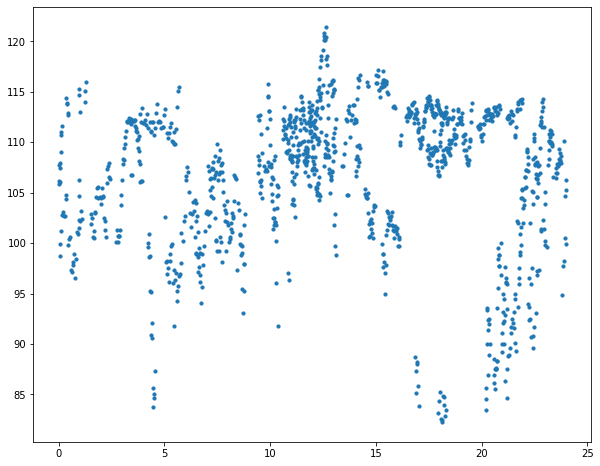

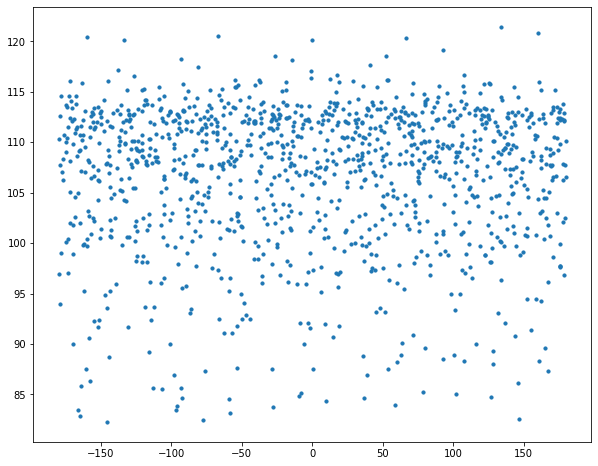

In [54]:
ls_sect_1 = hp_peri[hp_peri["Ls"] < 60]

plt.figure(figsize=(10, 8))
plt.scatter(ls_sect_1["lst"], ls_sect_1["hp_alt"], s=10)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(ls_sect_1["long"], ls_sect_1["hp_alt"], s=10)
plt.show()

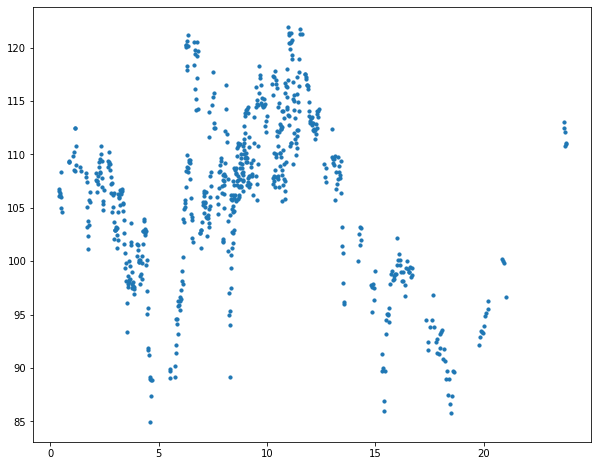

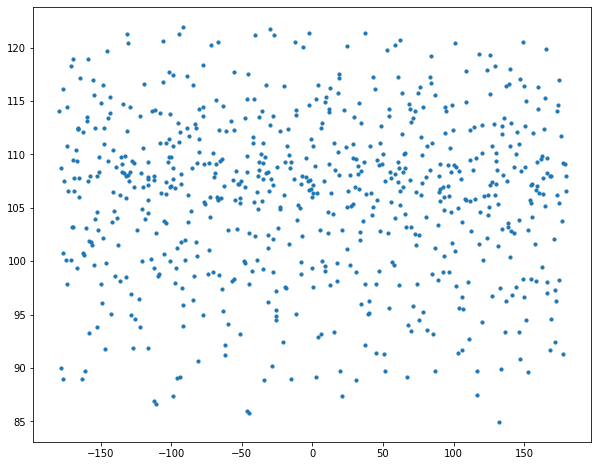

In [56]:
ls_sect_1 = hp_peri[(hp_peri["Ls"] > 140) & (hp_peri["Ls"] < 200)]

plt.figure(figsize=(10, 8))
plt.scatter(ls_sect_1["lst"], ls_sect_1["hp_alt"], s=10)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(ls_sect_1["long"], ls_sect_1["hp_alt"], s=10)
plt.show()

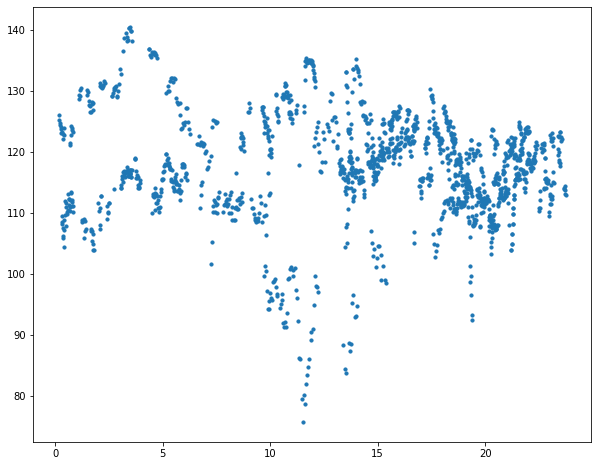

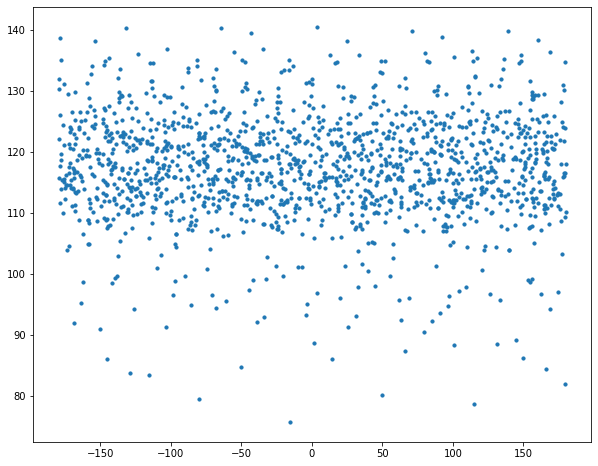

In [57]:
ls_sect_1 = hp_peri[(hp_peri["Ls"] > 250)]

plt.figure(figsize=(10, 8))
plt.scatter(ls_sect_1["lst"], ls_sect_1["hp_alt"], s=10)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(ls_sect_1["long"], ls_sect_1["hp_alt"], s=10)
plt.show()

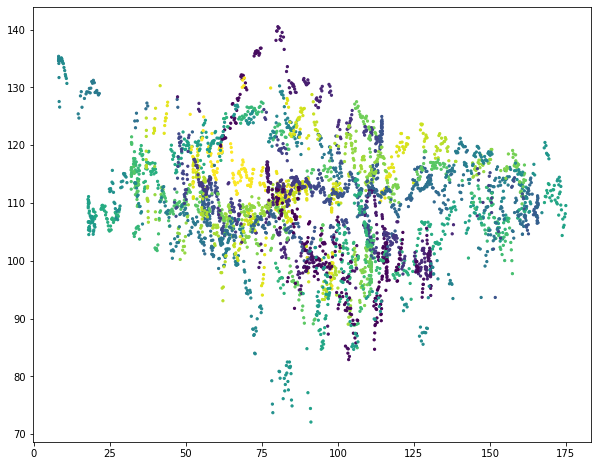

In [130]:
plt.figure(figsize=(10, 8))
plt.scatter(hp_peri["sza"], hp_peri["hp_alt"], s=5, c=hp_peri["lat"])
plt.show()

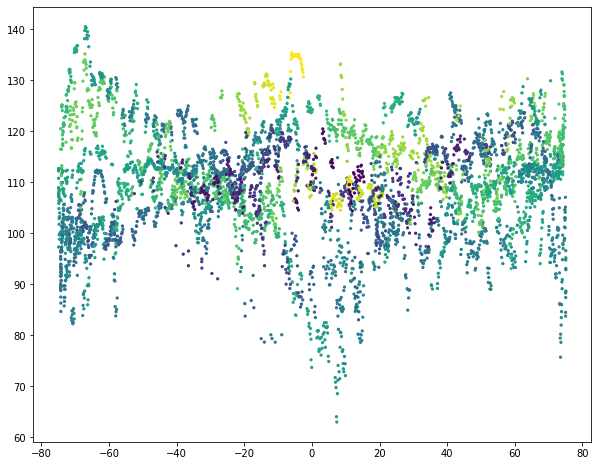

In [49]:
plt.figure(figsize=(10, 8))
plt.scatter(hp_peri["lat"], hp_peri["hp_alt"], s=5, c=hp_peri["sza"].apply(lambda x: 180-x))
plt.show()

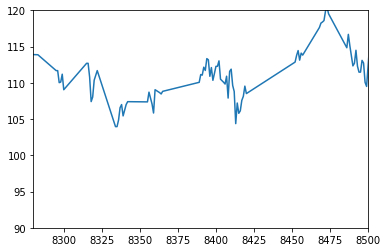

In [53]:
plt.figure()
plt.plot(hp_peri["orbit"], hp_peri["hp_alt"])
plt.xlim(8280, 8500)
plt.ylim(90,120)
plt.show()

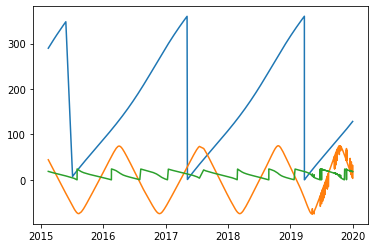

In [60]:
plt.figure()
plt.plot(hp_peri["dt"], hp_peri["Ls"])
plt.plot(hp_peri["dt"], hp_peri["lat"])
plt.plot(hp_peri["dt"], hp_peri["lst"])
plt.show()

In [88]:
tls = hp_peri[(hp_peri["Ls"] > 20) & (hp_peri["Ls"] < 100)]
tls = tls[(tls["lat"] < 0)]

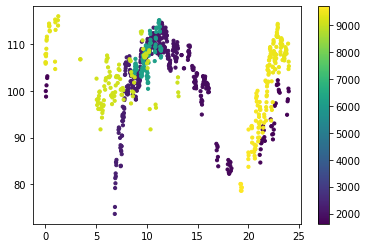

In [89]:
plt.figure()
plt.scatter(tls["lst"], tls["hp_alt"], c=tls["orbit"], s=10)
plt.colorbar()
plt.show()

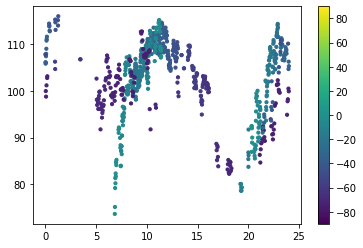

In [81]:
plt.figure()
plt.scatter(tls["lst"], tls["hp_alt"], c=tls["lat"], s=10, vmin=-90, vmax=90)
plt.colorbar()
plt.show()

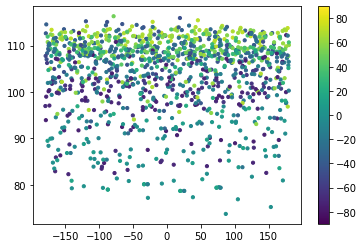

In [69]:
plt.figure()
plt.scatter(tls["long"], tls["hp_alt"], c=tls["lat"], s=10, vmin=-90, vmax=90)
plt.colorbar()
plt.show()